In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
from pypalettes import load_cmap
#cmap = load_cmap("Acanthurus_leucosternon")
cmap = load_cmap("Aquamarine")


In [6]:
# Import data from the source:
# https://www.kaggle.com/datasets/datascientistanna/customers-dataset/data

import kagglehub

# Download latest version
path = kagglehub.dataset_download("datascientistanna/customers-dataset")

print("Path to dataset files:", path)

c:\Users\user\miniconda3\envs\dsi_participant\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\datascientistanna\customers-dataset\versions\1


In [11]:
# Install kagglehub in case library is missing
# pip install kagglehub

In [7]:
df = pd.read_csv('./data/Customers.csv')

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [10]:
df.shape

(2000, 8)

In [11]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [12]:
# Let's check duplicates
df.duplicated().sum()

0

In [13]:
# Let's check missing values
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [14]:
# Cleaning dataset - have 35 missing datapoints in Profession column
# Let's check what is the most frequent value
mode_prof = df['Profession'].mode()[0]

In [15]:
mode_prof

'Artist'

In [16]:
# Filling missing values with most frequent one
df['Profession'] = df['Profession'].fillna(mode_prof)

In [17]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [18]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


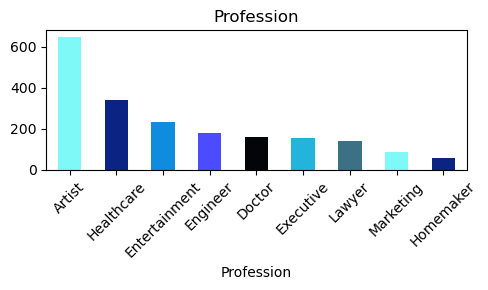

In [19]:
plt.figure(figsize=(5, 3))
df['Profession'].value_counts().plot(kind='bar', color=cmap.colors)
plt.title('Profession')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

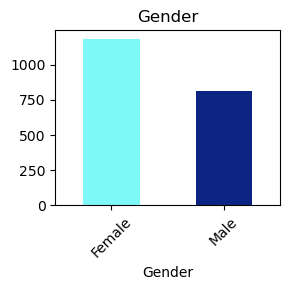

In [20]:
plt.figure(figsize=(3,3))
df['Gender'].value_counts().plot(kind='bar', color=cmap.colors)
plt.title('Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

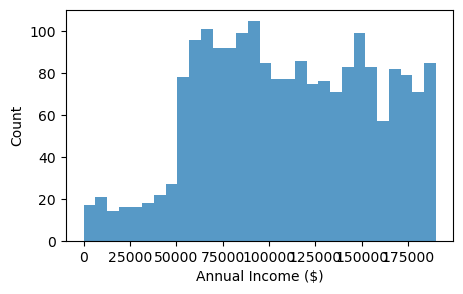

In [21]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='Annual Income ($)', bins=30, edgecolor='none')
plt.show()

In [22]:
print('Test')

Test
